# CV Project 2 for Face Recognition  

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow
tensorflow.__version__

'2.2.0-rc1'

In [0]:
import numpy as np
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder

In [0]:
import os
path = "/content/drive/My Drive/Dataset/"
os.chdir(path = path)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

### Extract the zip file 
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
from zipfile import ZipFile

with ZipFile(path+'Aligned Face Dataset from Pinterest.zip', 'r') as z:
   z.extractall()



In [0]:
pwd

'/content/drive/My Drive/Dataset'

In [0]:
!ls

'Aligned Face Dataset from Pinterest.zip'   PINS
 Digit_recognizer			    Prediction_data.csv
 images.npy				    SVHN_single_grey1.h5
 model-2.12.h5				    vgg_face_weights.h5
 pins


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

In [0]:
Aaron_image = load_image(metadata[1].image_path())

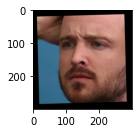

In [0]:
plt.subplot(131)
plt.imshow(Aaron_image)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model 
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face()
model.summary()
model.load_weights('vgg_face_weights.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [0]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images 
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
embeddings = np.zeros((metadata.shape[0], 2622))

In [0]:
for i, m in enumerate(metadata):
    img = load_image(m.image_path())
    load_image(img_path)
    # scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)
    # obtain embedding vector for image
    img = cv2.resize(img, dsize = (224,224))
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

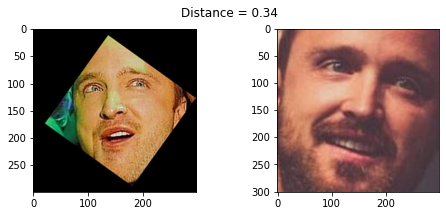

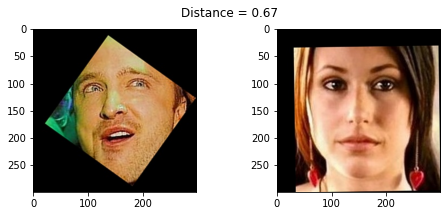

In [0]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

### Encode the Labels 
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)

# Numerical encoding of identities
y = encoder.transform(targets)

### Create train and test sets 
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and label

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0


X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

### Standardize the feature values 
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [0]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

### Reduce dimensions using PCA 
- Reduce feature dimensions using Principal Component Analysis

In [0]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_train_scaled.T)

In [0]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.37856344e-02  2.06518551e-02 -2.90826177e-03 ... -6.42522188e-03
   9.02346085e-05  3.98105407e-03]
 [ 8.70105799e-03 -1.02317323e-03 -1.30669306e-03 ...  5.66027332e-04
   4.52035577e-03  9.77785445e-03]
 [-3.12942715e-03  9.16744828e-03  6.16462090e-03 ... -3.36312462e-03
  -3.41946161e-03 -2.47248553e-02]
 ...
 [-8.10346070e-03 -2.31294578e-02 -1.13750296e-02 ... -1.93133357e-02
   2.86550577e-02 -5.16126248e-02]
 [ 2.11731970e-02 -3.67706724e-03  9.28585844e-04 ...  1.26092098e-02
  -6.56735677e-04 -2.40449668e-03]
 [ 3.88352430e-02  1.16315748e-02  1.54528555e-02 ... -2.06975813e-02
   1.20363403e-02 -2.79901566e-02]]

 Eigen Values 
%s [3.55900484e+02 1.40876981e+02 1.04497872e+02 ... 1.51342209e-03
 1.53508983e-03 1.54123168e-03]


In [0]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 13.57220848  18.9445298   22.92953957 ...  99.99999983  99.99999999
 100.        ]


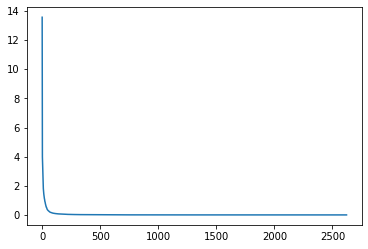

In [0]:
plt.plot(var_exp)

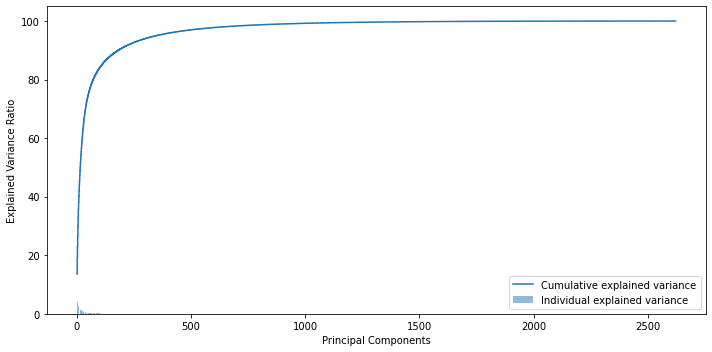

In [0]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [0]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA


pca = PCA(n_components=1000)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_train_reduced.transpose()

array([[-1.60202412e+01, -9.74160632e+00, -2.60761413e+01, ...,
         3.80526076e+01,  3.48656930e+01,  1.64330113e+01],
       [-7.65584122e+00,  3.72682514e-01,  1.10822198e+01, ...,
        -1.77619283e+01, -1.15613523e+01, -2.40223305e+01],
       [-3.96452673e+00,  9.16986642e-02,  1.85735129e+01, ...,
         3.22445381e+00, -1.12346216e+01, -1.41670777e+01],
       ...,
       [ 9.11942259e-02, -1.34968882e-01, -5.19554640e-02, ...,
         1.92073931e-01,  4.02356647e-02, -2.41520543e-02],
       [-1.30057049e-01,  2.11025744e-01, -3.39286634e-01, ...,
        -1.92734872e-01,  7.77654056e-02,  1.98465127e-01],
       [ 2.55673167e-01,  8.51910261e-02,  3.28256115e-01, ...,
         2.82604829e-01,  1.11210751e-01, -1.16581353e-01]])

In [0]:
X_test_reduced = pca.fit_transform(X_test_scaled)
X_test_reduced.transpose()

array([[-1.67989484e+01, -1.95482710e+01, -1.54728237e+01, ...,
         2.84218853e+01,  2.01389537e+01,  3.08863393e+01],
       [ 7.05232598e+00,  2.33231683e+01,  1.49437652e+01, ...,
        -1.93117607e+01, -3.17816037e+01, -2.91764034e+01],
       [-1.20717372e+00, -1.79439237e+00,  5.82068476e+00, ...,
        -1.09954727e+01, -2.83583120e+00, -1.29115553e+01],
       ...,
       [-1.77059196e-02, -6.38600343e-02,  9.93665374e-02, ...,
         6.66264325e-02,  1.46933909e-01, -2.81277101e-02],
       [-1.72159983e-01, -6.57429525e-02, -3.07954542e-02, ...,
         9.84893269e-02,  5.08222191e-02, -9.29262108e-02],
       [-8.34071029e-02, -2.09312342e-02,  8.24895521e-02, ...,
         4.90442243e-02, -6.96338624e-02, -1.61920925e-01]])

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [0]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svc = LinearSVC()

knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

acc_knn = accuracy_score(y_test, knn.predict(X_test))
acc_svc = accuracy_score(y_test, svc.predict(X_test))

print(f'KNN accuracy = {acc_knn}, SVM accuracy = {acc_svc}')

KNN accuracy = 0.9181286549707602, SVM accuracy = 0.9657477025898078


In [0]:
knn_reduced = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svc_reduced = LinearSVC()
knn_reduced.fit(X_train_reduced, y_train)
svc_reduced.fit(X_train_reduced, y_train)

acc_knn_reduced = accuracy_score(y_test, knn_reduced.predict(X_test_reduced))
acc_svc_reduced = accuracy_score(y_test, svc_reduced.predict(X_test_reduced))

print(f'KNN_reduced accuracy = {acc_knn_reduced}, SVM_reduced accuracy = {acc_svc_reduced}')

KNN_reduced accuracy = 0.040100250626566414, SVM_reduced accuracy = 0.018379281537176273


### Test results 
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

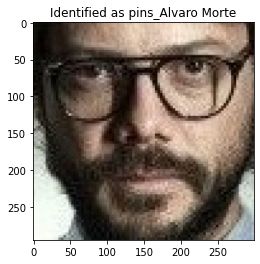

In [0]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([embeddings[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

# Explanation
We have imported Pintrest images. Then we have loaded VGG model and loaded the images and generated embedded vectors for them. Post which PCA is applied to reduce the dimension and then at we did a comparision with the reduced dimenisonality. Post which we printed the image and identify the image. 